In [1]:
import pandas as pd

In [2]:
import numpy as np

In [45]:
escolaridad = pd.read_csv("escolaridad_por_comuna.csv", sep=';', names=["nombre_comuna", "EI"])

In [46]:
escolaridad.shape

(52, 2)

In [47]:
comunas = pd.read_csv("datos_por_comuna.csv", sep=';', names=['comuna', 'nombre_comuna', 'population','idh'])

In [48]:
comunas.shape

(52, 4)

In [50]:
escolaridad = escolaridad.merge(comunas[["nombre_comuna", "comuna"]])
escolaridad = escolaridad[['comuna', 'EI']]

In [51]:
ingresos = pd.read_csv("ingresos_por_comuna.csv", sep=';', names=["nombre_comuna", "II"])

In [53]:
ingresos = ingresos.merge(comunas[["nombre_comuna", "comuna"]])
ingresos = ingresos[['comuna', 'II']]

In [58]:
expectativa = pd.read_csv('DEF_2015.csv')

In [63]:
expectativa = expectativa[['COMUNA', 'EDAD_TIPO', 'EDAD_CANT']]

In [72]:
expectativa['LEI'] = (expectativa.EDAD_CANT * (expectativa.EDAD_TIPO==1)) \
                    +(expectativa.EDAD_CANT * (expectativa.EDAD_TIPO==2) / 12)  \
                    + (expectativa.EDAD_CANT * (expectativa.EDAD_TIPO==3) / 365)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [80]:
expectativa = expectativa[['COMUNA','LEI']].groupby('COMUNA').mean().reset_index()

In [88]:
expectativa.columns = ['comuna', 'LEI']

In [93]:
datos_hdi = expectativa.merge(ingresos).merge(escolaridad)

In [95]:
datos_hdi.LEI = [(lei - 20) / (85 - 20) for lei in datos_hdi.LEI]

In [98]:
datos_hdi.EI = [ei / 15 for ei in datos_hdi.EI]

In [ ]:
#Noviembre 2013: 1 peso chileno = XXX dolares (XXX es el factor de conversion)
# XXX = 1/519

In [99]:
datos_hdi.II = [(np.log(ii*12/519) - np.log(100)) / (np.log(75000) - np.log(100)) for ii in datos_hdi.II]

In [110]:
datos_hdi["HDI_2013"] = np.power(datos_hdi.LEI*datos_hdi.EI*datos_hdi.II, 0.333333)

In [111]:
datos_hdi.to_csv("hdi_2013_por_comuna.csv")

In [112]:
datos_hdi.head()

,comuna,LEI,II,EI,HDI,HDI_2013
0,13101,0.791672,0.873137,0.924099,0.861223,0.861223
1,13102,0.782817,0.800343,0.713499,0.764616,0.764616
2,13103,0.752447,0.750382,0.657961,0.718874,0.718874
3,13104,0.784872,0.760697,0.705426,0.749585,0.749585
4,13105,0.777236,0.780019,0.673876,0.742015,0.742015


In [113]:
datosComuna = pd.read_csv("datos_por_comuna.csv", delimiter=';', names = ["comuna", "nombre_comuna", "population", "idh"])

In [121]:
correl = datosComuna.merge(datos_hdi).dropna()

In [123]:
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


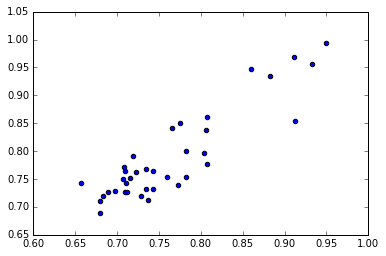

In [125]:
plt.scatter(correl.idh, correl.HDI_2013)
#plt.xlim(0,1)
#plt.xscale('log')
#plt.yscale('log')

In [127]:
from scipy import stats
stats.pearsonr(correl.idh, correl.HDI_2013)

(0.89805961842324644, 4.8663877025869476e-14)